# Übung 12

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden wir uns mit daten-getriebener Modellierung mithilfe von Nächste Nachbarn Modellen beschäftigen. Nächste Nachbarn Modelle gehören zu den einfachsten Machine Learning Modellen. Viele weitere Modelle können Sie im Bachelor Kurs "Machine Learning" kennenlernen. Ich lade Sie herzlich dazu ein, sich für den Kurs Bachelorkurs "Machine Learning" anzumelden, sollten Sie Interesse haben.

###  12.1 Weinqualitäten (Multiklassen-Klassifikation, Feature Engineering)

* Diese Übung kennen Sie in abgewandelter Form aus der optionalen Übung 11.3. Falls Sie Übung 11.3 schon bearbeitet haben, können Sie sich von dort für eine Lösung hier inspirieren lassen.

In dieser Übung werden wir ein Nächste Nachbarn (NN) Modell erstellen, mit dem wir die Klasse eines Weines (d.h. die Kultursorte) aus den Eigenschaften vorhersagen können. Wir werden mit PCA-transformierten Merkmalen arbeiten.

**Ihre Daten**

Zu Beginn der 90er Jahre wurden verschiedene Weinproben in einer Region Italiens untersucht. Die Weine stammen von drei verschiedenen Kultursorten. Diese Kultursorten werden im unten hinterlegten Datensatz als Klasse 1, 2 und 3 (*class labels*) bezeichnet. Unter den 13 untersuchten Merkmalen finden Sie neben chemischen Eigenschaften (Alkoholgehalt, Säuregehalt) auch physikalische Eigenschaften (Farbintensität, etc).

Ich habe Ihnen den Weindatensatz in zwei Teile geteilt: Der erste Datensatz ist der sogenannte Trainingsdatensatz, mithilfe dessen Sie ihr Modell bauen werden. Der zweite Datensatz ist der sogenannte Testdatensatz, auf dem Sie ihr Modell anwenden und testen werden.

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# import data
column_names = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
                'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                 header=None)
df.columns = column_names

# preprocess data
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=10)

# apply PCA
pca = PCA(n_components=2)
X_train_p = pca.fit_transform(X_train)
X_test_p = pca.transform(X_test)


**Ihre Aufgaben**

(1) Importieren Sie die Daten, indem Sie die obere Code-Zelle ausführen.

(2) Vergegenwärtigen Sie sich die Eigenschaften des Wein-Datensatzes: Untersuchen Sie dazu das Pandas-Objekt. Welche Eigenschaften wurden für die Weine erfasst? Wie viele Weinproben wurden genommen?

In [52]:
print("Anzahl Eigenschaften: ", df.columns[1:-1].shape[0])
df.columns[1:-1]

Anzahl Eigenschaften:  12


Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines'],
      dtype='object')

12 Erfasste Eigenschaften der Weine:

- Alkohol
- Apfelsäure
- Asche
- Alkalität der Asche
- Magnesium
- Gesamtphenole
- Flavonoide
- Nichtflavonoid-Phenole
- Proanthocyanidine
- Farbintensität
- Farbton
- Optische Dichte OD280/OD315 von verdünnten Weinen


In [53]:

print("Anzahl probierter Weine:", df.shape[0])

Anzahl probierter Weine: 178


(3) Lesen Sie den Code ab dem Kommentar `# preprocess data`. Was passiert in diesen Code-Zeilen? Welches Feature-Engineering findet statt, bis wir zu den Daten `X_train_p, X_test_p` angekommen sind, mit denen Sie dann arbeiten werden? Wie viele Features (Merkmale) haben die transformierten Daten?

`X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values`
Aufteilung der Daten in Eigenschaften (`X`, alle Spalten bis auf erste Spalte) und Klassen (`y`,erste Spalte)

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)`
Zufällige Aufteilung der Daten in einen `train`-Teil und einen `test`-Teil, mit einem `test`-Anteil von 40%. Somit sind 72 Datensätze in den Testdaten und 106 in Training

`pca = PCA(n_components=2)`
`X_train_p = pca.fit_transform(X_train)`
Die PCA führt eine Dimensionsreduktion auf den Trainingsdaten durch. Von 13 Dimensionen gibt es nun nur noch 2. Es wird zunächst ein Fit ausgeführt, also die Hauptkomponenten bestimmt, durch die Diagonalisierung der Kovarianzmatrix.
Dann werden die Trainingsdaten in den neuen 2D-Raum transformiert.

`X_test_p = pca.transform(X_test)`
Auch die Test-Daten werden in den reduzierten Raum transformiert.

Nach der Transformation haben die Daten dann nur noch 2 Merkmale, wie vorhin durch `n_components=2` eingestellt.


(4) Visualisieren Sie in zwei Scatterplots den PCA-transformierten Trainingsdatensatz sowie den Testdatensatz. Färben Sie die Punkte in beiden Plots ein gemäß der Klassenzugehörigkeit, wie Sie in Ihrem Vektor `y_train` bzw. `y_test` kodiert ist. Die Einträge in `y_train` und `y_test` werden auch *Labels* genannt.
* Hinweis: Vielleicht wollen Sie sich an Ihrem Code aus früheren Übungen bedienen, wo Sie eine ähnliche Aufgabe schon einmal gelöst haben.

In [3]:
plt.scatter(X_train_p[:, 0], X_train_p[:, 1], c=y_train)
plt.title("Trainingsdaten")
plt.show()

plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=y_test)
plt.title("Testdaten")
plt.show()


NameError: name 'X_train_p' is not defined

(5) Wir werden jetzt ein NN-Modell (Nächste Nachbarn Modell) erstellen. Schreiben Sie dazu eine Funktion mit dem Namen `NN`, die die Trainingsdaten (`X_train_p` und `y_train`) sowie die Testdaten (`X_test_p`) entgegen nimmt und die vorhergesagten Klassen (Labels) für die Testdaten als Vektor (`y_pred`) zurückgibt. Schlagen Sie in den Vorlesungsfolien nach, wie ein NN Modell definiert ist und nutzen Sie für die Implementierung numpy Funktionen. Broadcasting kann Ihnen ebenfalls sehr hilfreich sein.

In [55]:
def NN(x_train, y_train, x_test):
  y_pred = np.zeros(x_test.shape[0])
  for i in range(x_test.shape[0]):
    distances = np.linalg.norm(x_train - x_test[i], axis=1)
    y_pred[i] = y_train[np.argmin(distances)]

  return y_pred


(6) Sie haben in Schritt (5) ein einfaches Machine Learning Modell implementiert, einen Klassifikator. Sagen Sie mithilfe Ihrer Funktion die Labels (Klassen) der Weinproben des Testdatensatzes voraus und speichern Sie die Voraussage im Vektor `y_pred`.

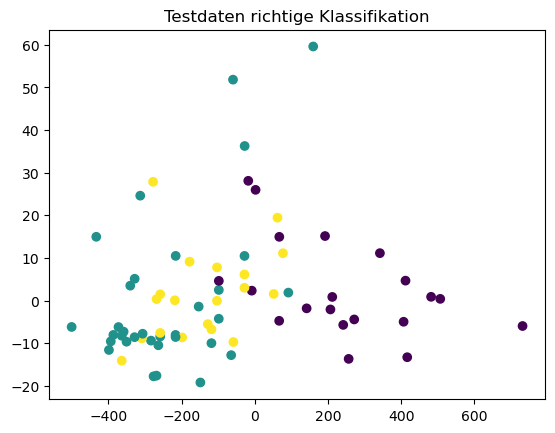

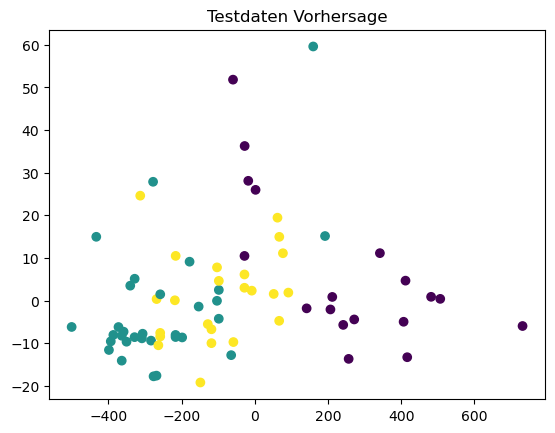

In [56]:
y_pred = NN(X_train_p, y_train, X_test_p)

plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=y_test)
plt.title("Testdaten richtige Klassifikation")
plt.show()

plt.scatter(X_test_p[:, 0], X_test_p[:, 1], c=y_pred)
plt.title("Testdaten Vorhersage")
plt.show()

(7) Bestimmen Sie die *Accuracy* Ihrer Vorhersage, also den Anteil der korrekt vorhergesagten Klassen dividiert durch die Gesamtanzahl aller Vorhersagen. Beurteilen Sie anhand der *Accuracy*, ob Ihr Modell die Klassen des Testdatensatzes gut vorhersagen kann.

In [57]:
def calculateAccuracy(y_pred):
  N = y_pred.shape[0]
  TP = np.sum(y_pred == y_test)
  return TP / N


ACC = calculateAccuracy(y_pred)
print(f"Accuracy: ACC = {ACC:.2f}")

Accuracy: ACC = 0.69


(8) Wiederholen Sie Schritt (5), allerdings für Trainingsdaten, deren Features Sie auf Mittelwert $0$ und Varianz $1$ [normiert](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) haben:

- Normieren Sie also die ursprünglichen Trainingsdaten **vor der PCA**, führen Sie dann die PCA mit den normierten Daten durch und klassifizieren Sie die aus der PCA resultierenden Daten. Welche Genauigkeit (Accuracy) erhalten Sie nun auf den Trainingsdaten? Wie erklären Sie sich diese Veränderung im Vergleich zu dem Ergebnis aus Schritt (7)?

- Normieren Sie anschließend auch die Testdaten, und zwar so, dass diese mit denselben Parametern wie die Trainingsdaten normiert werden. Dies bedeutet: Fitten Sie den StandardScaler auf die Trainingsdaten (`.fit`) und wenden Sie diese Transformation nun auch auf die Testdaten an (`.transform`).

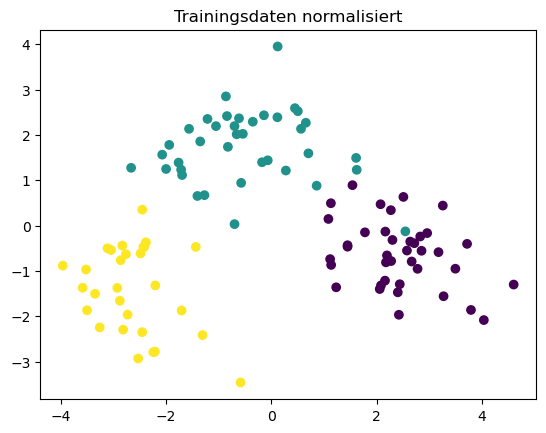

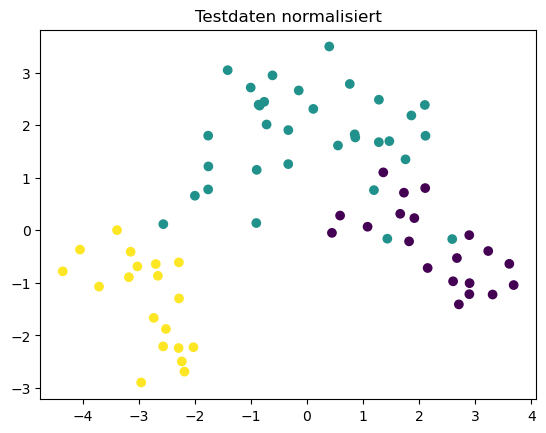

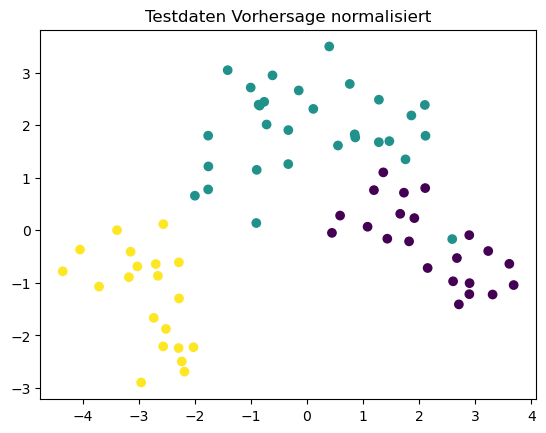

Accuracy: ACC = 0.69, Accuracy normalized: ACC_norm = 0.96


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)

pca = PCA(n_components=2)
X_train_normalized_p = pca.fit_transform(X_train_normalized)

X_test_normalized = scaler.transform(X_test)
X_test_normalized_p = pca.transform(X_test_normalized)

plt.scatter(X_train_normalized_p[:, 0], X_train_normalized_p[:, 1], c=y_train)
plt.title("Trainingsdaten normalisiert")
plt.show()

plt.scatter(X_test_normalized_p[:, 0], X_test_normalized_p[:, 1], c=y_test)
plt.title("Testdaten normalisiert")
plt.show()

y_pred_normalized = NN(X_train_normalized_p, y_train, X_test_normalized_p)

plt.scatter(X_test_normalized_p[:, 0], X_test_normalized_p[:, 1], c=y_pred_normalized)
plt.title("Testdaten Vorhersage normalisiert")
plt.show()

N = y_pred_normalized.shape[0]
TP_norm = np.sum(y_pred_normalized == y_test)

ACC_norm = TP_norm / N

print(f"Accuracy: ACC = {ACC:.2f}, Accuracy normalized: ACC_norm = {ACC_norm:.2f}")

Die Accuracy ist nun viel besser! Wenn man sich die Scatterplots durchsieht, fällt auf, dass durch die Normalisierung eine viel bessere Aufteilung der Bereiche geschieht.

(9) Wir werden nun untersuchen, wie sich die *Accuracy* mit der Anzahl $k$ der nächsten Nachbarn ändert. Nutzen Sie die [Implementierung des kNN Modells von scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), um die Accuracy als Funktion von $k$ zu ermitteln ($k\in\{1, \ldots, 50\}$).

**Hinweise**

* Trainieren Sie Ihr Modell auf dem Trainingsset.
* Ermitteln Sie die Accuracies auf den Testsets.

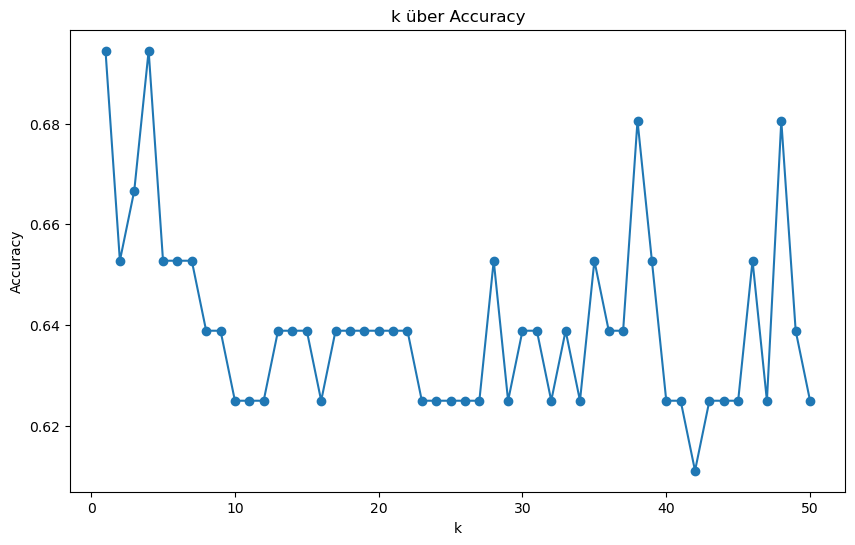

In [63]:
from sklearn.neighbors import KNeighborsClassifier


def NN_k(X_train, y_train, X_test, k):
  NN_k = KNeighborsClassifier(n_neighbors=k)
  NN_k.fit(X_train, y_train)
  return NN_k.predict(X_test)

k_range = np.arange(1, 51)
ACC_k = []

for k in k_range:
  ACC_k.append(calculateAccuracy(NN_k(X_train_p, y_train, X_test_p, k)))

plt.figure(figsize=(10, 6))
plt.plot(k_range, ACC_k, marker='o')
plt.title('k über Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()



(10) Visualisieren Sie die Accuracy als Funktion von $k$. Bestimmen Sie den besten Wert $k$.

Damit darf ich Ihnen gratulieren. Sie haben ein k-Nächste Nachbarn Modell an einen Datensatz angepasst.

### 12.2 k-nächste-Nachbarn Klassifikation
In dieser kurzen Übungsaufgabe werden Sie sich weiter mit dem kNN-Klassifikator vertraut machen und die Wirkung des Parameters $k$ untersuchen.

**Ihre Aufgaben**

(1) Visualisieren Sie die weiter unten erzeugten synthetischen Daten.

(2) Fitten Sie einen [kNN-Klassifikator](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) an die Daten mit $k=1$ und visualisieren Sie mit der Hilfsfunktion `plot_decision_regions` die entstandenen Entscheidungsflächen.

(3) Wiederholen Sie Schritt (2) für einige wenige Werte von $k$. Variieren Sie dabei $k$ zwischen $1$ und $50$. Wie verändern sich die Entscheidungsflächen? Wie verändert sich, Ihrer Meinung nach, die Komplexität des kNN-Modells mit dem Wert $k$?

(4) Machen Sie Ihre Visualisierung aus Schritt (3) interaktiv, indem Sie [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/) benutzen, und über einen Slider Werte für $k$ auswählen können.

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

# helper function to plot decision boundaries
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  #plt.axis('equal') # von mir hinzugefügt
  plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=np.expand_dims(cmap(idx), 0),
                marker=markers[idx], label=cl)


# generate 100 data points: features X, labels y
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           n_clusters_per_class=1, class_sep=0.5, random_state=2)


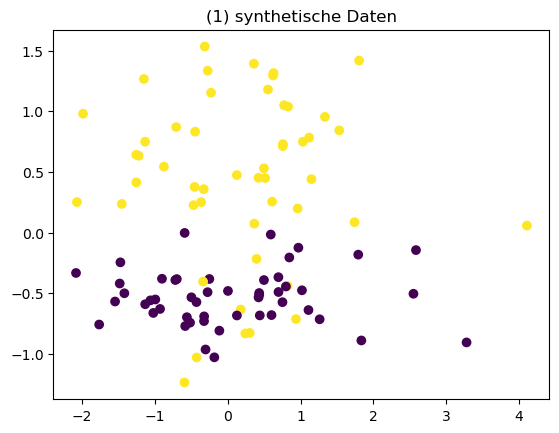

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("(1) synthetische Daten")
#plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Entscheidungsflächen mit k=1')

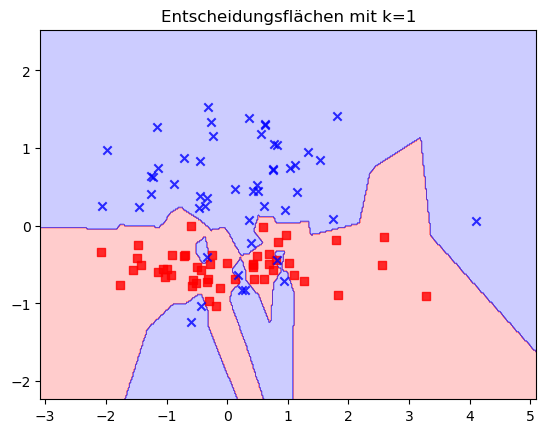

In [9]:
def makeClassifier(k) -> KNeighborsClassifier:
  myClassifier = KNeighborsClassifier(n_neighbors=k)
  myClassifier.fit(X, y)
  return myClassifier

plot_decision_regions(X,y,makeClassifier(1))
plt.title('Entscheidungsflächen mit k=1')

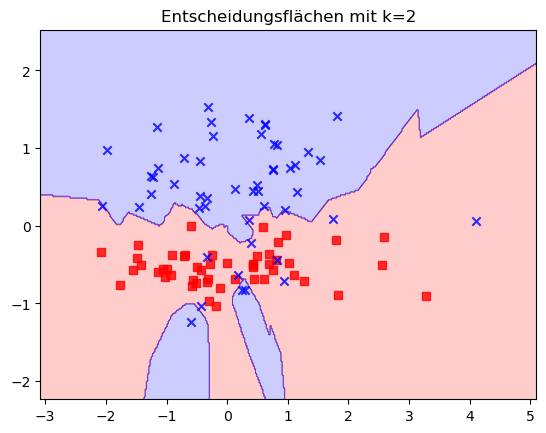

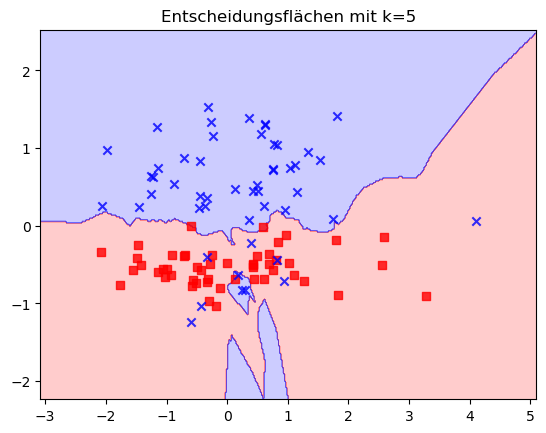

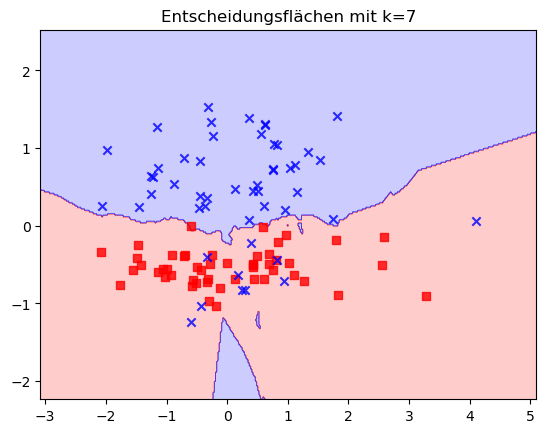

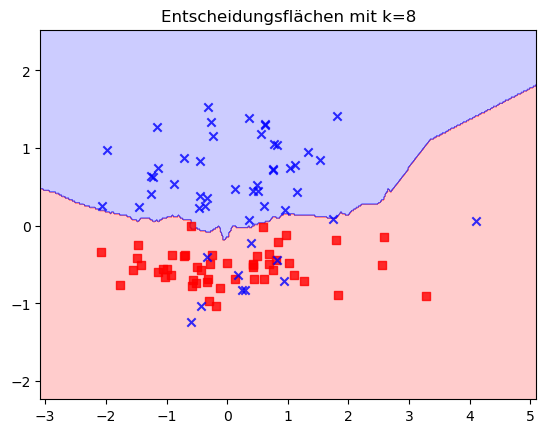

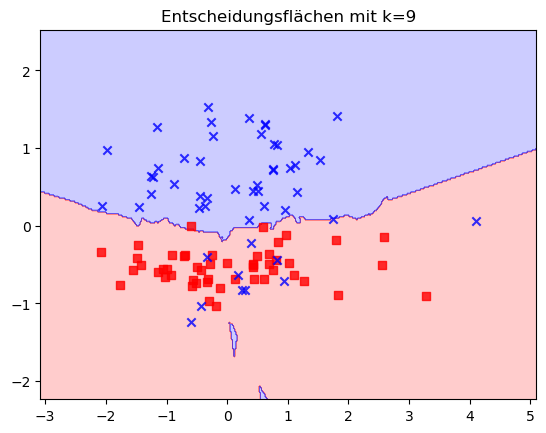

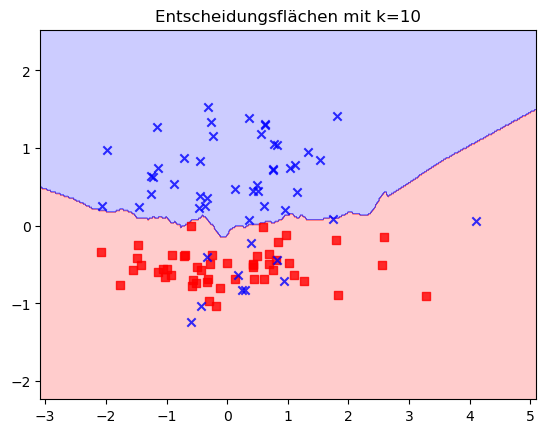

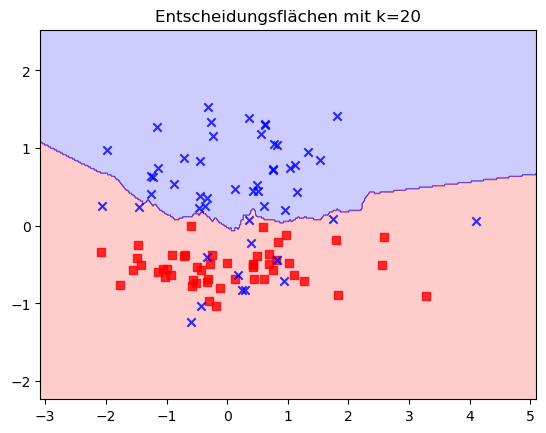

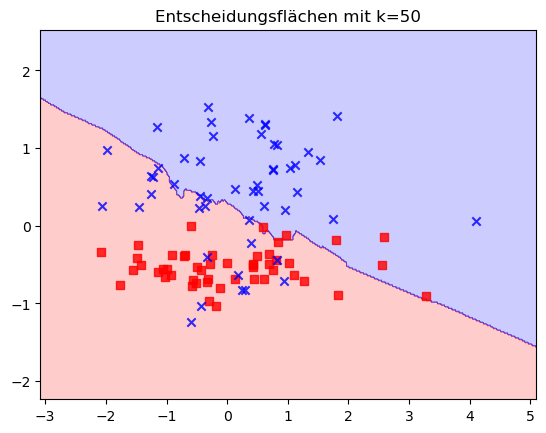

In [12]:
for k in [2,5,7,8,9,10,20,50]:
  plot_decision_regions(X,y,makeClassifier(k))
  plt.title(f'Entscheidungsflächen mit k={k}')
  plt.show()